
# 영화 추천 시스템 



# PROBLEM STATEMENT

- 추천시스템은 영화나 노래등을 추천하는데 사용되며, 주로 관심사나 이용 내역을 기반으로 추천한다.
- 이 노트북에서는, Item-based Collaborative Filtering 으로 추천시스템을 구현한다.

- Dataset MovieLens: https://grouplens.org/datasets/movielens/100k/ 


영화보고 별점 얼마 줬는지를 가지고 분석
영화가 영화랑 얼마나 유사도를 갖나 분석하기 위해선 상관관계 분석
영화는 컬럼 자리에 있어야함

# STEP #0: LIBRARIES IMPORT


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/빅데이터 분석/week08')

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: '/content/drive/MyDrive/Colab Notebooks/빅데이터 분석/week08'

# STEP #1: IMPORT DATASET

### Movie_Id_Titles.csv 파일을 읽어온다.

In [ ]:
movie_titles_df = pd.read_csv('Movie_Id_Titles.csv')

In [ ]:
movie_titles_df.head(3)

### 'u.data' 파일을 구글드라이브에서 열어보면

그러면, 탭으로 구분되어 있고, 맨 위에 컬럼이름이 없다.

따라서 컬럼이름을 'user_id', 'item_id', 'rating', 'timestamp' 로 지어주면서 데이터프레임으로 읽어온다.

In [ ]:
movies_rating_df =pd.read_csv('u.data', sep = '\t' , names = ['user_id', 'item_id', 'rating', 'timestamp'])  # sep = \t 탭으로 분리됨

In [ ]:
movies_rating_df.head(3)

### timestamp 컬럼은 필요없으니, movies_rating_df 에서 제거한다.

In [ ]:
movies_rating_df.drop('timestamp', axis=1, inplace=True)

### 두개의 데이터프레임을 합친다.

### 어떻게 합칠지 모양을 잘 보고 합친다.

In [ ]:
movies_rating_df = movies_rating_df.merge(movie_titles_df, on = 'item_id')

In [ ]:
movies_rating_df.head()

In [ ]:
movies_rating_df.loc[ movies_rating_df['user_id']==0, ]

# STEP #2: VISUALIZE DATASET

### 각 영화 제목별로, 별점에 대한 기본통계치(최대,최소,중앙,표준편차,1/4,3/4 값)를 보인다.

In [ ]:
titles = movies_rating_df.groupby('title')

In [17]:
titles.describe()

user_id                                 \
                                        count        mean         std    min   
title                                                                          
'Til There Was You (1997)                 9.0  383.777778  204.272354  152.0   
1-900 (1994)                              5.0  477.000000  244.344020  181.0   
101 Dalmatians (1996)                   109.0  450.330275  295.142779    1.0   
12 Angry Men (1957)                     125.0  453.552000  255.588677    1.0   
187 (1997)                               41.0  517.097561  241.098300    3.0   
...                                       ...         ...         ...    ...   
Young Guns II (1990)                     44.0  504.068182  254.101371   87.0   
Young Poisoner's Handbook, The (1995)    41.0  452.487805  286.352241    7.0   
Zeus and Roxanne (1997)                   6.0  532.833333  343.690219   82.0   
unknown                                   9.0  311.888889  264.160200    1.0   
Á köldum klaka (Cold Fever) (1994)        1.0  655.000000         NaN  655.0   

                                                                  item_id  \
                                         25%    50%    75%    max   count   
title                                                                       
'Til There Was You (1997)              223.0  342.0  530.0  782.0     9.0   
1-900 (1994)                           385.0  405.0  581.0  833.0     5.0   
101 Dalmatians (1996)                  183.0  435.0  699.0  938.0   109.0   
12 Angry Men (1957)                    268.0  429.0  661.0  932.0   125.0   
187 (1997)                             416.0  532.0  698.0  894.0    41.0   
...                                      ...    ...    ...    ...     ...   
Young Guns II (1990)                   301.0  459.0  732.5  943.0    44.0   
Young Poisoner's Handbook, The (1995)  246.0  473.0  634.0  936.0    41.0   
Zeus and Roxanne (1997)                251.5  627.5  796.5  881.0     6.0   
unknown                                130.0  297.0  422.0  833.0     9.0   
Á köldum klaka (Cold Fever) (1994)     655.0  655.0  655.0  655.0     1.0   

                                               ...                 rating  \
                                         mean  ...     75%     max  count   
title                                          ...                          
'Til There Was You (1997)              1300.0  ...  1300.0  1300.0    9.0   
1-900 (1994)                           1353.0  ...  1353.0  1353.0    5.0   
101 Dalmatians (1996)                   225.0  ...   225.0   225.0  109.0   
12 Angry Men (1957)                     178.0  ...   178.0   178.0  125.0   
187 (1997)                              330.0  ...   330.0   330.0   41.0   
...                                       ...  ...     ...     ...    ...   
Young Guns II (1990)                   1188.0  ...  1188.0  1188.0   44.0   
Young Poisoner's Handbook, The (1995)   547.0  ...   547.0   547.0   41.0   
Zeus and Roxanne (1997)                1164.0  ...  1164.0  1164.0    6.0   
unknown                                 267.0  ...   267.0   267.0    9.0   
Á köldum klaka (Cold Fever) (1994)     1633.0  ...  1633.0  1633.0    1.0   

                                                                           \
                                           mean       std  min   25%  50%   
title                                                                       
'Til There Was You (1997)              2.333333  1.000000  1.0  2.00  2.0   
1-900 (1994)                           2.600000  1.516575  1.0  1.00  3.0   
101 Dalmatians (1996)                  2.908257  1.076184  1.0  2.00  3.0   
12 Angry Men (1957)                    4.344000  0.719588  2.0  4.00  4.0   
187 (1997)                             3.024390  1.172344  1.0  2.00  3.0   
...                                         ...       ...  ...   ...  ...   
Young Guns II (1990)                   2.772727  1.008421  1.0  2.

In [18]:
movies_rating_df.groupby(by = 'title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


### 각 영화별 별점의 평균을 구하고, 이를 ratings_df_mean 에 저장한다.

In [19]:
titles['rating'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [20]:
ratings_df_mean = titles['rating'].mean()

### 각 영화별로, 몇개의 데이터가 있는지 구하고, 이를 ratings_df_count 에 저장한다.

In [21]:
movies_rating_df.groupby(by = 'title')['rating'].count()

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [22]:
ratings_df_count = movies_rating_df.groupby(by = 'title')['rating'].count()

- 신뢰도 파악 가능

In [23]:
ratings_df_count  # 신뢰도 파악 가능

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

### 두 데이터프레임을 합친다.

- join은 2차원 이상일 때만 사용
- concat 은 컬럼이 똑같을 때 사용

In [24]:
ratings_mean_count_df =  pd.concat([ratings_df_count,ratings_df_mean], axis=1)

In [25]:
ratings_mean_count_df

,rating,rating
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390
...,...,...
Young Guns II (1990),44,2.772727
"Young Poisoner's Handbook, The (1995)",41,3.341463
Zeus and Roxanne (1997),6,2.166667


### 컬럼명을 확인하면, 합쳐진 컬럼들이 rating, rating 이라고 되어있다.
### 이를 count, mean 으로 컬럼명을 셋팅한다.

In [26]:
ratings_mean_count_df.columns=['count' ,'mean']

In [27]:
ratings_mean_count_df

,count,mean
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390
...,...,...
Young Guns II (1990),44,2.772727
"Young Poisoner's Handbook, The (1995)",41,3.341463
Zeus and Roxanne (1997),6,2.166667


### mean 으로 히스토그램을 그린다.

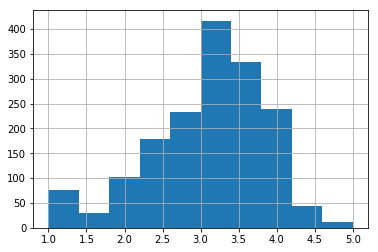

In [28]:
ratings_mean_count_df['mean'].hist()
plt.show()

### count 로 히스토그램을 그린다.

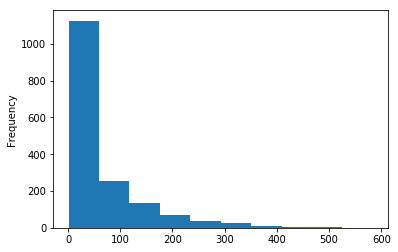

In [29]:
ratings_mean_count_df['count'].plot(kind='hist')
plt.show()

### 평균점수가 5점인 영화들은 어떤 영화인지 확인한다.

In [30]:
ratings_mean_count_df.loc[ ratings_mean_count_df['mean']==5,]

,count,mean
title,,
Aiqing wansui (1994),1,5.0
Entertaining Angels: The Dorothy Day Story (1996),1,5.0
"Great Day in Harlem, A (1994)",1,5.0
Marlene Dietrich: Shadow and Light (1996),1,5.0
Prefontaine (1997),3,5.0
"Saint of Fort Washington, The (1993)",2,5.0
Santa with Muscles (1996),2,5.0
Someone Else's America (1995),1,5.0
Star Kid (1997),3,5.0


### count 가 가장 많은 것부터 정렬하여 100개까지만 보인다.

In [31]:
ratings_mean_count_df.sort_values(by = 'count', ascending=False).head(100)

,count,mean
title,,
Star Wars (1977),584,4.359589
Contact (1997),509,3.803536
Fargo (1996),508,4.155512
Return of the Jedi (1983),507,4.007890
Liar Liar (1997),485,3.156701
...,...,...
Aladdin (1992),219,3.812785
Babe (1995),219,3.995434
Volcano (1997),219,2.808219


# STEP #3: 영화 하나에 대한, ITEM-BASED COLLABORATIVE FILTERING 수행!

- movies_rating_df 를 가지고 아래 피봇테이블 한다.

### 피봇 테이블을 하여, 콜라보레이티브 필터링 포맷으로 변경

In [32]:
movies_rating_df

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [33]:
movies_rating_df.pivot_table(index='user_id', columns='title',values='rating')

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
userid_movietitle_metrix = movies_rating_df.pivot_table(index='user_id', columns='title',values='rating')

In [35]:
userid_movietitle_metrix.loc[ 23, 'Star Wars (1977)']

4.0

### 전체 영화와 타이타닉 영화의 상관관계 분석을 하면 타이타닉을 본 사람들에게 상관계수가 높은 영화를 추천하면 된다.
### corrwith 함수를 이용한다.

In [36]:
userid_movietitle_metrix['Titanic (1997)']

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

In [37]:
userid_movietitle_metrix.corrwith ( userid_movietitle_metrix['Titanic (1997)'] )

C:\Users\Gokkiri\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Gokkiri\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)               -0.062017
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.120113
12 Angry Men (1957)                      0.077700
187 (1997)                               0.315654
                                           ...   
Young Guns II (1990)                     0.317274
Young Poisoner's Handbook, The (1995)    0.356783
Zeus and Roxanne (1997)                       NaN
unknown                                       NaN
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [38]:
titanic_series =userid_movietitle_metrix.corrwith ( userid_movietitle_metrix['Titanic (1997)'] )

- 즉 타이타닉을 봤을 때 추천할 수 있는 영화는

In [39]:
pd.DataFrame(titanic_series, columns=['Correlation'])  # 타이타닉을 봤을 때 추천할 수 있는 영화

,Correlation
title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654
...,...
Young Guns II (1990),0.317274
"Young Poisoner's Handbook, The (1995)",0.356783
Zeus and Roxanne (1997),NaN


In [40]:
titanic_correlations = pd.DataFrame(titanic_series, columns=['Correlation'])

In [41]:
# 옆에다가 영화 본 사람 수 컬럼 추가

In [42]:
titanic_correlations.join( ratings_mean_count_df['count'])

,Correlation,count
title,,
'Til There Was You (1997),-0.062017,9
1-900 (1994),NaN,5
101 Dalmatians (1996),0.120113,109
12 Angry Men (1957),0.077700,125
187 (1997),0.315654,41
...,...,...
Young Guns II (1990),0.317274,44
"Young Poisoner's Handbook, The (1995)",0.356783,41
Zeus and Roxanne (1997),NaN,6


In [43]:
titanic_correlations = titanic_correlations.join( ratings_mean_count_df['count'])

In [44]:
titanic_correlations.dropna(inplace=True)

In [45]:
titanic_correlations.sort_values(by='Correlation', ascending=False)

,Correlation,count
title,,
Nadja (1994),1.0,8
"Pest, The (1997)",1.0,8
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3
For Ever Mozart (1996),1.0,3
"Jerky Boys, The (1994)",1.0,3
...,...,...
Pather Panchali (1955),-1.0,8
Angel Baby (1995),-1.0,4
Blood Beach (1981),-1.0,6


- 추천시스템의 정확돌르 위해서는 여화를 본 ㅅ나람이 적어도 80명 이상인 데이터를 가지고 영화를 추천해 준다.

In [46]:
titanic_correlations_over80 = titanic_correlations.loc[ titanic_correlations['count']>= 80, ]

In [47]:
titanic_correlations_over80.sort_values(by= 'Correlation',ascending=False).head(7)

,Correlation,count
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
William Shakespeare's Romeo and Juliet (1996),0.430243,106
"Last of the Mohicans, The (1992)",0.427239,128


### 실습. star wars 를 본 사람들에게 영화를 추천한다. 5개의 추천 영화 제목을 찾는다.
#### 먼저 star wars 의 정확한 이름을 검색해서 찾는다. 그리고 나서 스타워즈를 본 유저의 데이터를 가져와서, 위와 같이 상관관계분석을 한다.

In [48]:
movie_titles_df.loc[movie_titles_df['title'].str.contains('ars'), ]

,item_id,title
49,50,Star Wars (1977)
145,146,Unhook the Stars (1996)
234,235,Mars Attacks! (1996)
270,271,Starship Troopers (1997)
689,690,Seven Years in Tibet (1997)
911,912,U.S. Marshalls (1998)
1463,1464,"Stars Fell on Henrietta, The (1995)"


In [49]:
movie_titles_df.loc[movie_titles_df['title'].str.lower().str.contains('star'), ]

,item_id,title
49,50,Star Wars (1977)
61,62,Stargate (1994)
123,124,Lone Star (1996)
145,146,Unhook the Stars (1996)
221,222,Star Trek: First Contact (1996)
226,227,Star Trek VI: The Undiscovered Country (1991)
227,228,Star Trek: The Wrath of Khan (1982)
228,229,Star Trek III: The Search for Spock (1984)
229,230,Star Trek IV: The Voyage Home (1986)
270,271,Starship Troopers (1997)


In [50]:
userid_movietitle_metrix['Star Wars (1977)']

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [51]:
starwars_data = userid_movietitle_metrix.corrwith(userid_movietitle_metrix['Star Wars (1977)'])

In [52]:
starwars = pd.DataFrame(starwars_data, columns=['Correlation'])

In [53]:
starwars = starwars.join(ratings_mean_count_df['count'])

In [54]:
starwars = starwars.loc[starwars['count'] >=80 ,]

In [55]:
starwars.dropna(inplace=True)

In [56]:
starwars.sort_values(by='Correlation', ascending=False).head(10)

,Correlation,count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


# STEP#4: 전체 데이터셋에 대한 ITEM-BASED COLLABORATIVE FILTER 를 만들자!

In [57]:
userid_movietitle_metrix.corr()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.0,NaN,-1.000000,-0.500000,-0.500000,0.522233,NaN,-0.426401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,1.0,NaN,NaN,NaN,NaN,NaN,-0.981981,NaN,NaN,...,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),-1.0,NaN,1.000000,-0.049890,0.269191,0.048973,0.266928,-0.043407,NaN,0.111111,...,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,0.000000,0.707107,NaN,NaN
12 Angry Men (1957),-0.5,NaN,-0.049890,1.000000,0.666667,0.256625,0.274772,0.178848,NaN,0.457176,...,NaN,NaN,NaN,0.096546,0.068944,-0.361961,0.144338,1.000000,1.0,NaN
187 (1997),-0.5,NaN,0.269191,0.666667,1.000000,0.596644,NaN,-0.554700,NaN,1.000000,...,NaN,0.866025,NaN,0.455233,-0.500000,0.500000,0.475327,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,0.680414,-0.361961,0.500000,0.132017,-0.518476,-0.154765,NaN,-0.054554,...,NaN,NaN,NaN,0.355001,0.722460,1.000000,0.866025,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,0.000000,0.144338,0.475327,0.204926,0.623795,-0.341753,NaN,0.707107,...,NaN,NaN,NaN,-0.413197,-0.019672,0.866025,1.000000,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,0.707107,1.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


- 이 상관계수는 유저가 1명이 점수 매긴 것도 다 포함되어 있는 상관계수다.
- 신뢰성에 문제가 생길 수 있다.

In [58]:
# 적어도 80명 이상이 점수를 준 영화를 대상으로 상관계수를 뽑는다.

userid_movietitle_metrix.corr(min_periods=80)  # uid 가 80개 이상인 것만 측정

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
movie_correlations = userid_movietitle_metrix.corr(min_periods=80) 

In [60]:
# 이제 이것만 있으면 영화 추천가능하다.

### 나의 별점 정보를 가지고, 영화를 추천해 달라고 할 것이다! 

내 영화 별점 정보는 My_Ratings.csv 파일에 있다. 

In [63]:
myRatings = pd.read_csv('My_Ratings.csv')

In [65]:
myRatings

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


In [66]:
movie_title = myRatings['Movie Name'][0]

In [67]:
movie_correlations[movie_title].dropna().sort_values(ascending = False).to_frame()  # 판다스를 데이터프레임으로 바꿈

,Liar Liar (1997)
title,
Liar Liar (1997),1.000000
Con Air (1997),0.469828
Pretty Woman (1990),0.469790
Michael (1996),0.442022
Indiana Jones and the Last Crusade (1989),0.414427
...,...
Leaving Las Vegas (1995),-0.137398
Fantasia (1940),-0.147819
This Is Spinal Tap (1984),-0.158213


In [68]:
reco_movie1 = movie_correlations[movie_title].dropna().sort_values(ascending = False).to_frame()

In [69]:
reco_movie1.rename(columns={ movie_title : 'Correlation'}, inplace=True)

In [70]:
reco_movie1['Weight'] = reco_movie1['Correlation'] * myRatings['Ratings'][0]   # 내 점수라는 가중치 반영됨

## 이제는 두번째 영화인, 스타워즈도 추천영화 똑같이 가져온다.

In [71]:
movie_title2 = myRatings['Movie Name'][1]

In [72]:
movie_correlations[movie_title2].dropna().sort_values(ascending=False).to_frame()

,Star Wars (1977)
title,
Star Wars (1977),1.000000
"Empire Strikes Back, The (1980)",0.748353
Return of the Jedi (1983),0.672556
Raiders of the Lost Ark (1981),0.536117
Austin Powers: International Man of Mystery (1997),0.377433
...,...
Little Women (1994),-0.121053
Dirty Dancing (1987),-0.156920
G.I. Jane (1997),-0.176734


In [73]:
reco_movie2 = movie_correlations[movie_title2].dropna().sort_values(ascending=False).to_frame()

In [74]:
reco_movie2.rename(columns={movie_title2:'Correlation'}, inplace=True)

In [75]:
reco_movie2

,Correlation
title,
Star Wars (1977),1.000000
"Empire Strikes Back, The (1980)",0.748353
Return of the Jedi (1983),0.672556
Raiders of the Lost Ark (1981),0.536117
Austin Powers: International Man of Mystery (1997),0.377433
...,...
Little Women (1994),-0.121053
Dirty Dancing (1987),-0.156920
G.I. Jane (1997),-0.176734


In [76]:
reco_movie2['weight'] = reco_movie2['Correlation'] * myRatings['Ratings'][1]

In [77]:
reco_movie2

,Correlation,weight
title,,
Star Wars (1977),1.000000,1.000000
"Empire Strikes Back, The (1980)",0.748353,0.748353
Return of the Jedi (1983),0.672556,0.672556
Raiders of the Lost Ark (1981),0.536117,0.536117
Austin Powers: International Man of Mystery (1997),0.377433,0.377433
...,...,...
Little Women (1994),-0.121053,-0.121053
Dirty Dancing (1987),-0.156920,-0.156920
G.I. Jane (1997),-0.176734,-0.176734


- 자 이제 패턴을 파악했으니 자동화 시키자

## 위의 추천영화 작업을 자동화 하기 위한 파이프라인을 만든다. 

##### 반복문을 사용하여 비슷한영화에 대한 데이터프레임을 만들고, 이를 아래 빈 데이터프레임에 계속하여 추가한다.
##### 반복문이 끝나면, 아래 데이터프레임을 wegiht 컬럼으로 정렬한다.

In [78]:
similar_movies_list = pd.DataFrame()

In [82]:
movie_correlations

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
for i in range(0, len(myRatings)) :
  movie_title = myRatings['Movie Name'][i]
  similar_movie = movie_correlations[movie_title2].dropna().sort_values(ascending=False).to_frame()
  similar_movie.rename(columns={movie_title2:'Correlation'}, inplace=True)
  similar_movie['Weight'] = similar_movie['Correlation'] * myRatings['Ratings'][i]
  similar_movies_list = similar_movies_list.append(similar_movie)

In [89]:
similar_movies_list.sort_values(by='Weight', ascending=False)

,Correlation,Weight
title,,
Star Wars (1977),1.000000,5.000000
"Empire Strikes Back, The (1980)",0.748353,3.741763
Return of the Jedi (1983),0.672556,3.362779
Raiders of the Lost Ark (1981),0.536117,2.680586
Austin Powers: International Man of Mystery (1997),0.377433,1.887164
...,...,...
Little Women (1994),-0.121053,-0.605266
Dirty Dancing (1987),-0.156920,-0.784599
G.I. Jane (1997),-0.176734,-0.883670
